# Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model #GARCH Models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import math
from statistics import NormalDist
from scipy.stats import t
from datetime import datetime
from scipy.stats import shapiro #Shapiro Test
from scipy import stats #t-test
import statsmodels.api as sm #Ljung-Box Test

# Reading Base Data
**Notes**
1. Using Imported Packages, Pandas, to read csv files obtained from Yahoo Finance, Market Watch, and Investing.com
2. Time period used (01-01-2006 to 01-01-2021)
3. Raw CSV file contains non-trading days
4. Raw CSV file is arranged in ascending order by Date

In [2]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2021-01-01'


#Philippines
PH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#df.loc['2000-6-1':'2000-6-10']

#Malaysia
MY = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/%5EKLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False)

#Signapore
SG = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False)

#Thailand
TH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False)

## Obtaining the Log Returns

In [3]:
def get_returns(df,d):
    '''
    The function obtains the log returns of the asset shifted d days
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    d : int
        The dth day being forecast
        (Assumed to be 1 for most cases)
        
    RETURNS
    -------
    df : pandas.DataFrame
        The data frame returns an updated data frame containing the
        'Returns' column
    '''
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
    return df

PH = get_returns(PH, 1)
MY = get_returns(MY, 1)
SG = get_returns(SG, 1)
TH = get_returns(TH, 1)

# Testing the Data
### Significance in the Difference of the Means
$H_0$ : The significance in the differences of the means is equal to 0 \
$H_a$ : The significance in the differences of the means is NOT equal to 0 

Reject $H_0$ iif $p$-value is less than $\alpha$.

In [4]:
#Philippines
print(stats.ttest_1samp(PH['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Malaysia
print(stats.ttest_1samp(MY['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Singapore
print(stats.ttest_1samp(SG['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Thailand
print(stats.ttest_1samp(TH['Returns'].dropna(), 0.0, alternative = 'two-sided'))

Ttest_1sampResult(statistic=1.5312984859189827, pvalue=0.12578225285285943)
Ttest_1sampResult(statistic=1.3056727061767108, pvalue=0.1917428192487317)
Ttest_1sampResult(statistic=0.30882477925956986, pvalue=0.7574719329512937)
Ttest_1sampResult(statistic=0.9072409769342172, pvalue=0.36433910578860573)


### Possibility of the Existance of Serial Correlations
$H_0$: There does not exist any serial correlation between the returns \
$H_a$: There exists serial correlation between the returns

Reject $H_0$ iif $p$-value is less than $\alpha$.

In [5]:
#Philippines
print(sm.stats.acorr_ljungbox(PH['Returns'].dropna(), lags=[20], return_df=True))

#Malaysia
print(sm.stats.acorr_ljungbox(MY['Returns'].dropna(), lags=[20], return_df=True))

#Singapore
print(sm.stats.acorr_ljungbox(SG['Returns'].dropna(), lags=[20], return_df=True))

#Thailand
print(sm.stats.acorr_ljungbox(TH['Returns'].dropna(), lags=[20], return_df=True))

      lb_stat     lb_pvalue
20  78.776323  6.327468e-09
      lb_stat     lb_pvalue
20  69.007224  2.643139e-07
      lb_stat  lb_pvalue
20  61.916399   0.000004
      lb_stat     lb_pvalue
20  82.149106  1.689804e-09


### Existence of Normality in Data
$H_0$: The data is normally distributed \
$H_a$: The data is NOT normally distributed

Reject $H_0$ iif $p$-value is less than $\alpha$.

In [6]:
#Philippines
print(shapiro(PH['Returns'].dropna()))

#Malaysia
print(shapiro(MY['Returns'].dropna()))

#Singapore
print(shapiro(SG['Returns'].dropna()))

#Thailand
print(shapiro(TH['Returns'].dropna()))

ShapiroResult(statistic=0.911659836769104, pvalue=7.827653221718428e-42)
ShapiroResult(statistic=0.9013330340385437, pvalue=3.0828566215145976e-44)
ShapiroResult(statistic=0.914750874042511, pvalue=9.249971163008117e-42)
ShapiroResult(statistic=0.8727799654006958, pvalue=0.0)


# Delta-Normal Approach

In [7]:
def get_VaR_DN(df, alpha):
    '''
    The function returns the d-day VaR of the asset
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
        
    RETURNS
    -------
    VaR : float
        The float returned is the VaR for the d-day with a 
        (1-alpha)% VaR
    '''
    sigma = np.std(df['Returns'])
    VaR = sigma*NormalDist().inv_cdf(1-alpha)
    return round(VaR, 5)

print(f'PH: {get_VaR_DN(PH, 0.05)}')
print(f'MY: {get_VaR_DN(MY, 0.05)}')
print(f'SG: {get_VaR_DN(SG, 0.05)}')
print(f'TH: {get_VaR_DN(TH, 0.05)}')

PH: 2.18134
MY: 1.23254
SG: 1.82905
TH: 2.0727


## Number of Trading Days
**Note: This is done to have a sample to train the data**
1. Standard number opf trading days to predict the future date : 250
2. Test when values change

## Creating a Fixed and Rolling Window to Estimate the VaR

### Fixed Window 

In [8]:
def fixed_window(df, test_size, alpha):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a fixed time window of size test_size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the fixed time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_DN(temp_df, alpha)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    VaR_df.index = pd.to_datetime(VaR_df.index, utc = None)
    return VaR_df

#Standard 250 test subjects
prediction_size = 365
alpha = 0.05

PH_fw_dn = fixed_window(PH, prediction_size,alpha)
MY_fw_dn = fixed_window(MY, prediction_size,alpha)
SG_fw_dn = fixed_window(SG, prediction_size,alpha)
TH_fw_dn = fixed_window(TH, prediction_size,alpha)



# Graphical Interpretation 
## Standard

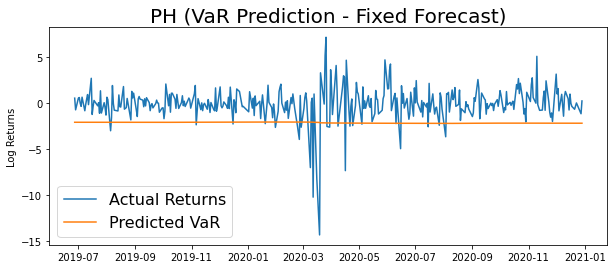

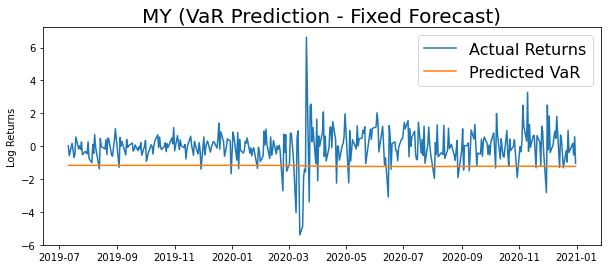

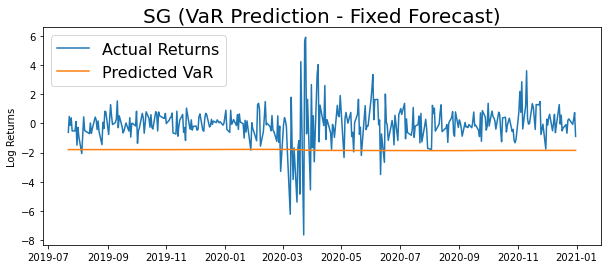

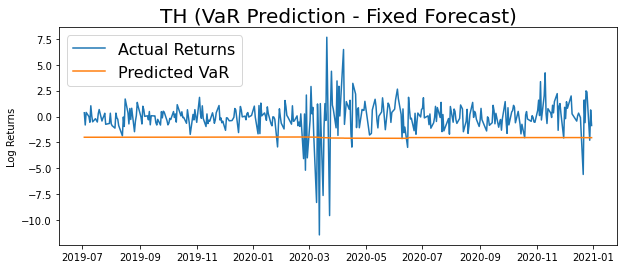

In [9]:
#Standard
prediction_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_fw_dn)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_fw_dn)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_fw_dn)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_fw_dn)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)


## Absolute Returns

In [10]:
# #Abolsute Returns
# prediction_size = 365

# #Philippines
# plt.figure(figsize=(10,4))
# plt.plot(abs(PH['Returns'].iloc[:-(len(PH)-prediction_size)]))
# plt.plot(PH_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Malaysia
# plt.figure(figsize=(10,4))
# plt.plot(abs(MY['Returns'].iloc[:-(len(MY)-prediction_size)]))
# plt.plot(MY_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Singapore
# plt.figure(figsize=(10,4))
# plt.plot(abs(SG['Returns'].iloc[:-(len(SG)-prediction_size)]))
# plt.plot(SG_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Thailand
# plt.figure(figsize=(10,4))
# plt.plot(abs(TH['Returns'].iloc[:-(len(TH)-prediction_size)]))
# plt.plot(TH_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)


### Backtesting Using a Fixed Window

In [11]:
def char_function(df, window, test_size):
    '''
    The function returns the number of VaR violations.
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a} chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
        (Data frames must be the same size)
    window : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
        (Data frames must be the same size)
        
    RETURNS
    -------
    N : int
        The value is the number of VaR violations
    '''
#     returns = abs(df['Returns'][:test_size].dropna())
    returns = df['Returns'][:test_size].dropna()
    f_returns = window['Forecasted VaR'].dropna()
    N = 0
    for i, j in zip(returns, f_returns):
        if i > j:
            N += 1 
    return returns, N

#Philippines
entries = len(PH_fw_dn)
returns, N = char_function(PH, PH_fw_dn,entries)
print(N)
print(N/entries)    

#Malaysia
entries = len(MY_fw_dn)
returns, N = char_function(MY, MY_fw_dn, entries)
print(N)
print(N/entries)      

#Singapore
entries = len(SG_fw_dn)
returns, N = char_function(SG, SG_fw_dn, entries)
print(N)
print(N/entries)      

#Thailand
entries = len(TH_fw_dn)
returns, N = char_function(TH, TH_fw_dn, entries)
print(N)
print(N/entries)      

  

23
0.06301369863013699
25
0.0684931506849315
14
0.038356164383561646
15
0.0410958904109589


### Rolling Window


In [12]:
def rolling_window(df, test_size, alpha):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a smaller time window to begin
    and gradually increasing the size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:]
        temp_VaR = get_VaR_DN(temp_df, alpha)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    return VaR_df

#Standard
prediction_size = 365
alpha = 0.05

PH_rw_dn = rolling_window(PH, prediction_size, alpha)
MY_rw_dn = rolling_window(MY, prediction_size, alpha)
SG_rw_dn = rolling_window(SG, prediction_size, alpha)
TH_rw_dn = rolling_window(TH, prediction_size, alpha)


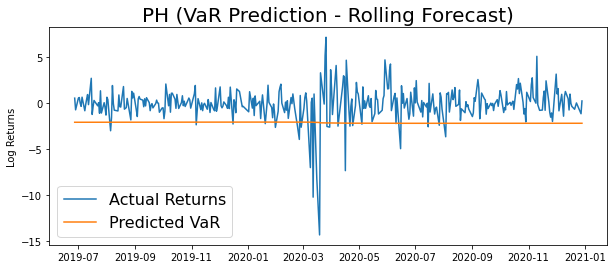

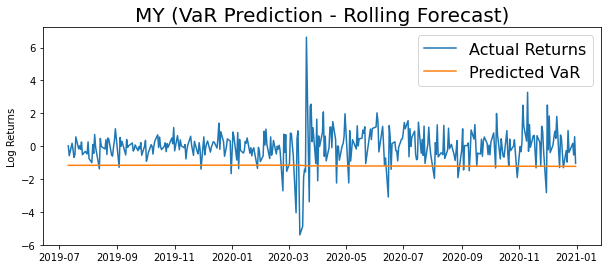

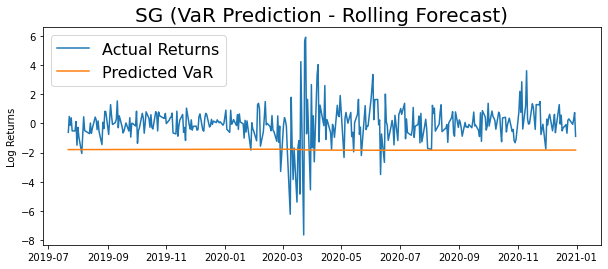

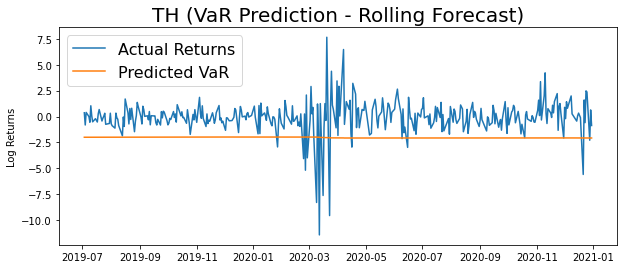

In [13]:
#Standard
prediction_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_rw_dn)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_rw_dn)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_rw_dn)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_rw_dn)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)




### Backtesting Using a Rolling Window


In [14]:
#Philippines
entries = len(PH_rw_dn)
returns, N = char_function(PH, PH_rw_dn, entries)
print(N)
print(N/entries)    

#Malaysia
entries = len(MY_rw_dn)
returns, N = char_function(MY, MY_rw_dn, entries)
print(N)
print(N/entries)      

#Singapore
entries = len(SG_rw_dn)
returns, N = char_function(SG, SG_rw_dn, entries)
print(N)
print(N/entries)      

#Thailand
entries = len(TH_rw_dn)
returns, N = char_function(TH, TH_rw_dn, entries)
print(N)
print(N/entries)    

22
0.06027397260273973
25
0.0684931506849315
15
0.0410958904109589
15
0.0410958904109589


# Historical Simulation

In [15]:
#Function to obtain the VaR using HS
def get_VaR_HS(df, alpha):
    M = len(df['Returns'])
    k = int(np.floor((1-alpha)*M))
    VaR = abs(df['Returns'].sort_values(ignore_index=True)[k-1])
    return round(VaR, 5)

#Philippines
print(f'PH : {get_VaR_HS(PH, 0.05)}')

#Malaysia
print(f'MY : {get_VaR_HS(MY, 0.05)}')

#Singapore
print(f'SG : {get_VaR_HS(SG, 0.05)}')

#Thailand
print(f'TH : {get_VaR_HS(TH, 0.05)}')

PH : 1.9548
MY : 1.12799
SG : 1.59203
TH : 1.72843


## Fixed Window

In [16]:
def fixed_window(df, test_size, alpha):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a fixed time window of size test_size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the fixed time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_DN(temp_df, alpha)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    VaR_df.index = pd.to_datetime(VaR_df.index, utc = None)
    return VaR_df

#Standard 250 test subjects
prediction_size = 365
alpha = 0.05


PH_fw_hs = fixed_window(PH, prediction_size,alpha)
MY_fw_hs = fixed_window(MY, prediction_size,alpha)
SG_fw_hs = fixed_window(SG, prediction_size,alpha)
TH_fw_hs = fixed_window(TH, prediction_size,alpha)


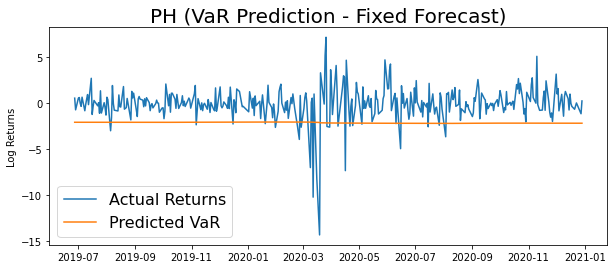

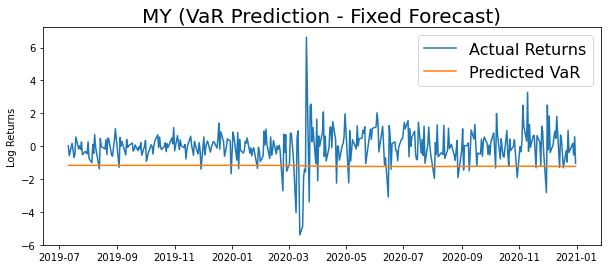

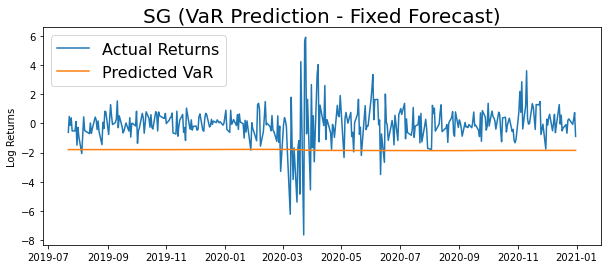

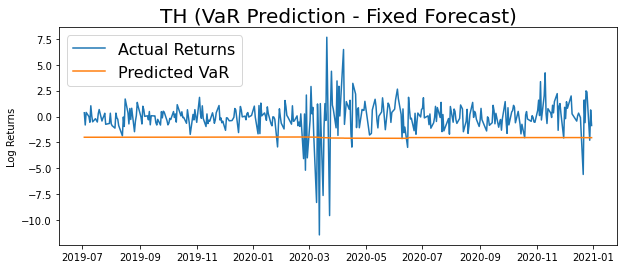

In [17]:
#Standard
prediction_size = 365
#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_fw_hs)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_fw_hs)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_fw_hs)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_fw_hs)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)


In [18]:
#Philippines
entries = len(PH_fw_hs)
returns, N = char_function(PH, PH_fw_hs, entries)
print(N)
print(N/entries)    

#Malaysia
entries = len(MY_fw_hs)
returns, N = char_function(MY, MY_fw_hs, entries)
print(N)
print(N/entries)      

#Singapore
entries = len(SG_fw_hs)
returns, N = char_function(SG, SG_fw_hs, entries)
print(N)
print(N/entries)      

#Thailand
entries = len(TH_fw_hs)
returns, N = char_function(TH, TH_fw_hs, entries)
print(N)
print(N/entries)      

  

23
0.06301369863013699
25
0.0684931506849315
14
0.038356164383561646
15
0.0410958904109589


## Rolling Window

In [19]:
def rolling_window(df, test_size, alpha):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a smaller time window to begin
    and gradually increasing the size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:]
        temp_VaR = get_VaR_DN(temp_df, alpha)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    return VaR_df

#Standard
prediction_size = 365
alpha = 0.05

PH_rw_hs = rolling_window(PH, prediction_size,alpha)
MY_rw_hs = rolling_window(MY, prediction_size,alpha)
SG_rw_hs = rolling_window(SG, prediction_size,alpha)
TH_rw_hs = rolling_window(TH, prediction_size,alpha)


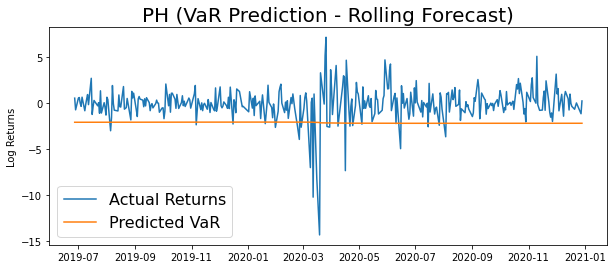

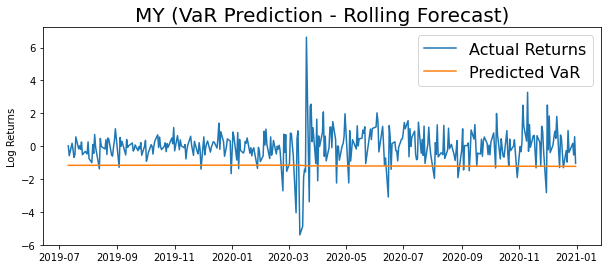

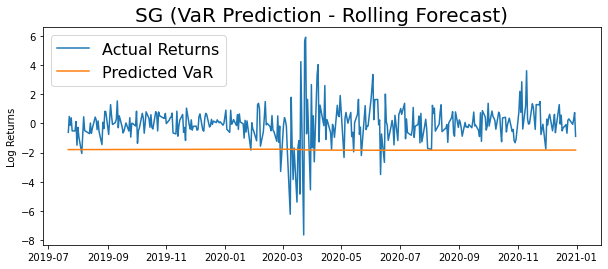

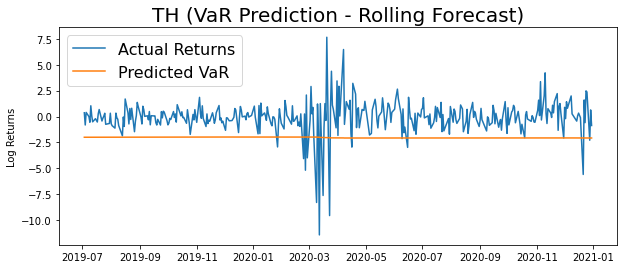

In [20]:
#Standard
prediction_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_rw_hs)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_rw_hs)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_rw_hs)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_rw_hs)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)




In [21]:
#Philippines
entries = len(PH_rw_hs)
returns, N = char_function(PH, PH_rw_hs, entries)
print(N)
print(N/entries)    

#Malaysia
entries = len(MY_rw_hs)
returns, N = char_function(MY, MY_rw_hs, entries)
print(N)
print(N/entries)      

#Singapore
entries = len(SG_rw_hs)
returns, N = char_function(SG, SG_rw_hs, entries)
print(N)
print(N/entries)      

#Thailand
entries = len(TH_rw_hs)
returns, N = char_function(TH, TH_rw_hs, entries)
print(N)
print(N/entries)    

22
0.06027397260273973
25
0.0684931506849315
15
0.0410958904109589
15
0.0410958904109589


# Boudoukh-Richardson-Whitelaw Approach

In [22]:
def get_weights_df(df, d, decay_par):
    count_returns = len(df["close"])-d # M
    weight_lst = [(1-decay_par)*(decay_par**j)/(1-decay_par**count_returns) for j in range(count_returns)]
    df["weight"] = pd.Series(weight_lst)
    return df

def get_ecdf(df):
    df = df.sort_values(by="change_in_value")
    df["ecdf"] = df["weight"].cumsum()
    return df

def get_VaR_BRW(df, alpha, decay_par):
    M = len(df['Returns'])
    weight_lst = [(1-decay_par)*(decay_par**j)/(1-decay_par**M) for j in range(M)]
    #display(weight_lst)
    weight_df = pd.DataFrame(weight_lst, columns = ['Weight'])
    df = df.reset_index()
    df = pd.merge(df, weight_df, left_index = True, right_index = True)
    df = df.set_index('Date')
    df = df.sort_values(by="Returns")
    df["ECDF"] = df["Weight"].cumsum()
    VaR = abs(np.interp(1-alpha, df["ECDF"], df["Returns"]))
    return round(VaR, 5)

#Philippines
print(f' PH : {get_VaR_BRW(PH, 0.05, 0.992)}')

#Malaysia"
print(f' MY : {get_VaR_BRW(MY, 0.05, 0.992)}')

#Singapore
print(f' SG : {get_VaR_BRW(SG, 0.05, 0.992)}')

#Thailand
print(f' TH : {get_VaR_BRW(TH, 0.05, 0.992)}')

 PH : 2.57222
 MY : 1.64242
 SG : 1.61638
 TH : 2.18847


## Fixed Window

In [23]:
def fixed_window(df, test_size, alpha, decay_par):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a fixed time window of size test_size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    decay_par : float
        The parameter for the BRW approach. Standard value is 0.992-0.998.
        The parameter is a value between 0 and 1.
    
    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the fixed time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_BRW(temp_df, alpha, decay_par)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    VaR_df.index = pd.to_datetime(VaR_df.index, utc = None)
    return VaR_df

#Standard 250 test subjects
prediction_size = 365
alpha = 0.05
decay_par = 0.992

PH_fw_brw = fixed_window(PH, prediction_size, alpha, decay_par)
MY_fw_brw = fixed_window(MY, prediction_size, alpha, decay_par)
SG_fw_brw = fixed_window(SG, prediction_size, alpha, decay_par)
TH_fw_brw = fixed_window(TH, prediction_size, alpha, decay_par)


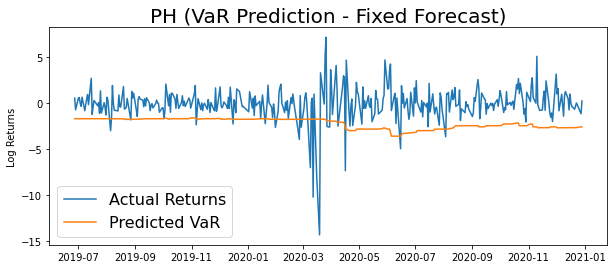

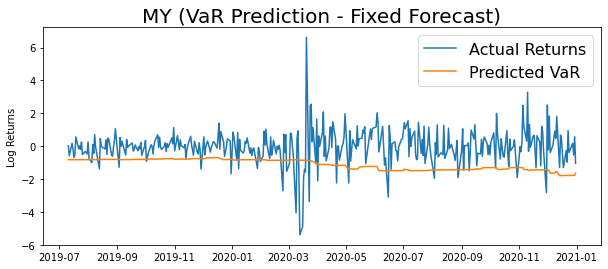

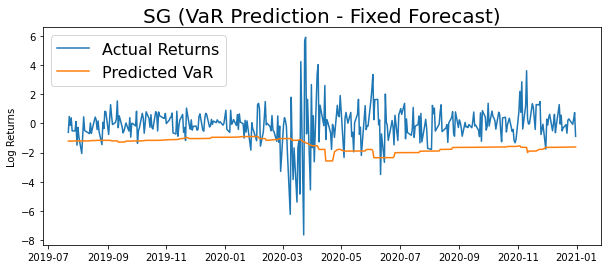

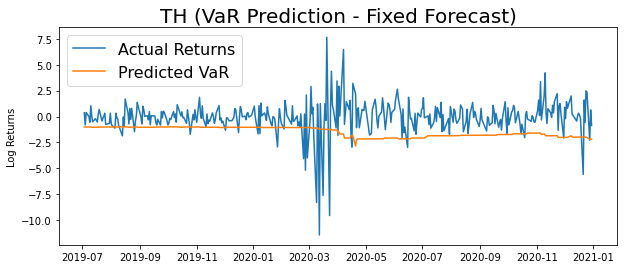

In [24]:
#Standard
prediction_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_fw_brw)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_fw_brw)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_fw_brw)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_fw_brw)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)


In [25]:
#Philippines
entries = len(PH_fw_brw)
returns, N = char_function(PH, PH_fw_brw, entries)
print(N)
print(N/entries)    

#Malaysia
entries = len(MY_fw_brw)
returns, N = char_function(MY, MY_fw_brw, entries)
print(N)
print(N/entries)      

#Singapore
entries = len(SG_fw_brw)
returns, N = char_function(SG, SG_fw_brw, entries)
print(N)
print(N/entries)      

#Thailand
entries = len(TH_fw_brw)
returns, N = char_function(TH, TH_fw_brw, entries)
print(N)
print(N/entries)  

25
0.0684931506849315
28
0.07671232876712329
21
0.057534246575342465
28
0.07671232876712329


## Rolling Window

In [26]:
def rolling_window(df, test_size, alpha, decay_par):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a smaller time window to begin
    and gradually increasing the size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    decay_par : float
        The parameter for the BRW approach. Standard value is 0.992-0.998.
        The parameter is a value between 0 and 1.

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_BRW(temp_df, alpha, decay_par)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    return VaR_df

#Standard
prediction_size = 365
alpha = 0.05
decay_par = 0.992

PH_rw_brw = rolling_window(PH, prediction_size, alpha, decay_par)
MY_rw_brw = rolling_window(MY, prediction_size, alpha, decay_par)
SG_rw_brw = rolling_window(SG, prediction_size, alpha, decay_par)
TH_rw_brw = rolling_window(TH, prediction_size, alpha, decay_par)

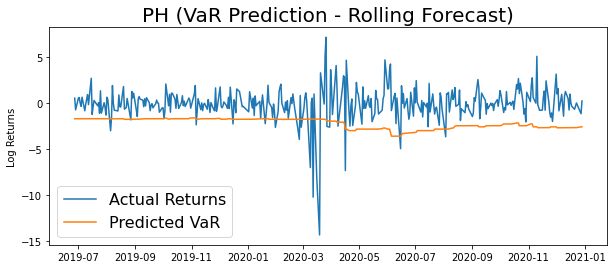

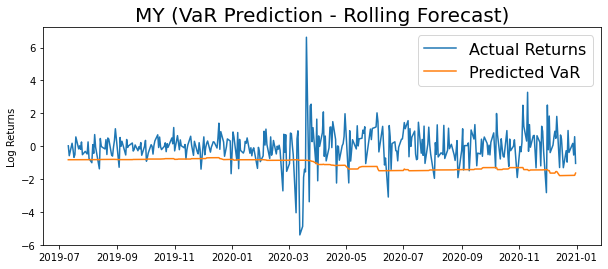

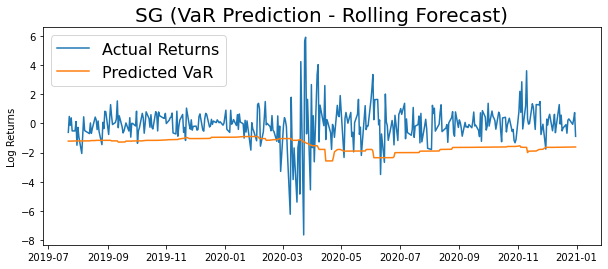

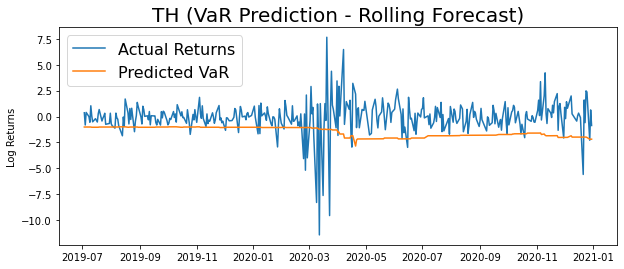

In [27]:
#Standard
prediction_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_rw_brw)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_rw_brw)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_rw_brw)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_rw_brw)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

In [28]:
#Philippines
entries = len(PH_rw_brw)
returns, N = char_function(PH, PH_rw_brw, entries)
print(N)
print(N/entries)    

#Malaysia
entries = len(MY_rw_brw)
returns, N = char_function(MY, MY_rw_brw, entries)
print(N)
print(N/entries)      

#Singapore
entries = len(SG_rw_brw)
returns, N = char_function(SG, SG_rw_brw, entries)
print(N)
print(N/entries)      

#Thailand
entries = len(TH_rw_brw)
returns, N = char_function(TH, TH_rw_brw, entries)
print(N)
print(N/entries)    

25
0.0684931506849315
28
0.07671232876712329
21
0.057534246575342465
28
0.07671232876712329


# Sufficiency of the Model
## Kupiec Test
If $N$ is an element of the open interval $(a, b)$, then the model sufficiently caputures the data. It follows that if $N$ is an element less than $a$ then the model overestimates the data while if $N$ is greater than $b$ then the model underestimates the data.

In [29]:
def CI_kupiec(alpha, ss):
    '''
    The function returns an (1-alpha)% confidence interval for N
    
    PARAMETERS
    ----------
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    ss : int
        The total number of entries in the data frame of the asset
        
    RETURNS
    -------
    CI : list
        The list is the (1-alpha)% confidence interval
    '''
    CI = []
    a = np.ceil(alpha*ss - (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    b = np.ceil(alpha*ss + (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    CI.append(a)
    CI.append(b)
    return CI

print(CI_kupiec(0.05,len(PH_fw_dn)))
print(CI_kupiec(0.05,len(MY_fw_dn)))
print(CI_kupiec(0.05,len(SG_fw_dn)))
print(CI_kupiec(0.05,len(TH_fw_dn)))


[11.0, 27.0]
[11.0, 27.0]
[11.0, 27.0]
[11.0, 27.0]


# DUMP CODE

In [30]:
# #Imported Packages
# import pandas_datareader as web
# from datetime import datetime, timedelta


# #Start date and End date
# def start_end (date_1, date_2):
#     start = datetime.strptime(date_1,'%d/%m/%Y').date()
#     end = datetime.strptime(date_2, '%d/%m/%Y').date()
#     return start, end

# start, end = start_end ('01/01/2016', '01/01/2021')
# print(start,end)

# #Stock Returns using PANDAS DATAREADER
# def stock_returns(ticker, start, end, index = 'yahoo', d = 1):
#     stock = web.DataReader(ticker, index, start, end)
#     stock['Previous'] = stock['Close'].shift(d)
#     stock['Returns'] = np.log(stock['Close']/stock['Previous'])
#     return stock.sort_index(axis=0, ascending=False)

# PSEI_PS = stock_returns('PSEI.PS', start, end, index = 'yahoo', d = 1)
# # print(PSEI_PS)
# print(PSEI_PS)

### Testing the Kupiec Test

In [31]:
# def binom_dist(N, alpha, ss):
#     '''
#     The function returns the test statistics of the binomial
#     distribution
    
#     PARAMETERS
#     ----------
#     N : int
#         The value is the number of VaR violations
#     alpha : float 
#         The level of significance of the VaR
#         (Assumes a value in between 0 and 1)
#     ss : int
#         The total number of entries in the data frame of the asset
        
#     RETURNS
#     -------
#     ts : float
#         The value is the test statistic of the binomial distribution
#     '''
#     return (N-alpha*ss)/np.sqrt(ss*(1-alpha)*alpha)

# binom_dist(10, 0.01, 972)


In [33]:
# def CI_kupiec(alpha, ss):
#     '''
#     The function returns an (1-alpha)% confidence interval for N
    
#     PARAMETERS
#     ----------
#     alpha : float 
#         The level of significance of the VaR
#         (Assumes a value in between 0 and 1)
#     ss : int
#         The total number of entries in the data frame of the asset
        
#     RETURNS
#     -------
#     CI : list
#         The list is the (1-alpha)% confidence interval
#     '''
#     CI = []
#     a = np.ceil(alpha*ss - (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
#     b = np.ceil(alpha*ss + (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
#     CI.append(a)
#     CI.append(b)
#     return CI

# CI_kupiec(0.05,972)
